In [1]:
%matplotlib inline
import pymc3 as pm
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

# %config InlineBackend.figure_format = 'retina'
# plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])

# Typo - page 194, "So it's no good"
# Typo - page 196, "you did this IS (in) earlier chapters"
# Typo - page 203, "...as a measure __ model performance" (probably missing the word 'of')
# Typo - page 217, in rethinking box: "[add cite to sub paper?]"
# Typo - page 218, entire overthinking box
# Typo - page 219, "...exist that dominate AIC IS (in) every context"
# Typo - page 219, "Unfortunately, IT'S (its) generality..."
# Typo - page 221, broken figure link
# Typos - page 244, "IT'S job...IT'S job..." (two times) both should be its.

In [3]:
# R code 7.1
data = {'species':["afarensis","africanus","habilis","boisei",
                    "rudolfensis","ergaster","sapiens"],
        'brainvolcc':[438 , 452 , 612, 521, 752, 871, 1350],
        'masskg':[37.0 , 35.5 , 34.5 , 41.5 , 55.5 , 61.0 , 53.5]
       }

d=pd.DataFrame(data)
d

,species,brainvolcc,masskg
0,afarensis,438,37.0
1,africanus,452,35.5
2,habilis,612,34.5
3,boisei,521,41.5
4,rudolfensis,752,55.5
5,ergaster,871,61.0
6,sapiens,1350,53.5


In [4]:
# R code 7.2
d['mass_std']= (d.masskg - d.masskg.mean())/d.masskg.std()
d['brain_std'] = d.brainvolcc/max(d.brainvolcc)
d

,species,brainvolcc,masskg,mass_std,brain_std
0,afarensis,438,37.0,-0.779467,0.324444
1,africanus,452,35.5,-0.917020,0.334815
2,habilis,612,34.5,-1.008722,0.453333
3,boisei,521,41.5,-0.366808,0.385926
4,rudolfensis,752,55.5,0.917020,0.557037
5,ergaster,871,61.0,1.421380,0.645185
6,sapiens,1350,53.5,0.733616,1.000000


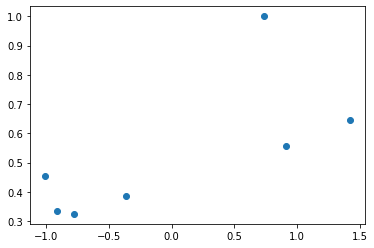

In [5]:
plt.plot(d.mass_std, d.brain_std, 'o');

In [6]:
# R code 7.3
# Simple, linear model that compares mass and brain size.
with pm.Model() as m_7_1:
    alpha = pm.Normal('alpha', mu=0.5, sd=1) 
    beta_mass = pm.Normal('beta_mass', mu=0, sd=10) 
    mu = pm.Deterministic('mu', alpha + beta_mass*d.mass_std)
    sigma = pm.Lognormal('sigma', mu=0, sd=1)
    brain = pm.Normal('brain', mu=mu, sd=sigma, observed=d.brain_std)
    trace_7_1 = pm.sample(10000, chains=1) 

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, beta_mass, alpha]
100%|██████████████████████████████████████████████████████████████████████████| 10500/10500 [00:06<00:00, 1627.33it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks


In [7]:
varnames = ['alpha','beta_mass']
pm.summary(trace_7_1, var_names = varnames, alpha = 0.11).round(2)

,mean,sd,mc_error,hpd_5.5,hpd_94.5
alpha,0.53,0.11,0.0,0.35,0.69
beta_mass,0.17,0.12,0.0,-0.01,0.34


In [8]:
# R code 7.6
# second-degree polynomial

with pm.Model() as m_7_2:
    alpha = pm.Normal('alpha', mu=0.5, sd=1) 
    beta_mass = pm.Normal('beta_mass', mu=0, sd=10, shape=2) 
    mu = pm.Deterministic('mu', alpha + beta_mass[0]*d.mass_std 
                          + beta_mass[1]*d.mass_std**2)
    sigma = pm.Lognormal('sigma', mu=0, sd=1)
    brain = pm.Normal('brain', mu=mu, sd=sigma, observed=d.brain_std)
    trace_7_2 = pm.sample(10000, chains=1) 

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, beta_mass, alpha]
100%|███████████████████████████████████████████████████████████████████████████| 10500/10500 [00:10<00:00, 962.26it/s]
There were 6 divergences after tuning. Increase `target_accept` or reparameterize.
Only one chain was sampled, this makes it impossible to run some convergence checks


In [9]:
with pm.Model() as m_7_3:
    alpha = pm.Normal('alpha', mu=0.5, sd=1) 
    beta_mass = pm.Normal('beta_mass', mu=0, sd=10, shape=3) 
    mu = pm.Deterministic('mu', alpha + beta_mass[0]*d.mass_std 
                          + beta_mass[1]*d.mass_std**2 + beta_mass[2]*d.mass_std**3)
    sigma = pm.Lognormal('sigma', mu=0, sd=1)
    brain = pm.Normal('brain', mu=mu, sd=sigma, observed=d.brain_std)
    trace_7_3 = pm.sample(10000, chains=1) 

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, beta_mass, alpha]
100%|███████████████████████████████████████████████████████████████████████████| 10500/10500 [00:17<00:00, 609.16it/s]
There were 85 divergences after tuning. Increase `target_accept` or reparameterize.
Only one chain was sampled, this makes it impossible to run some convergence checks


In [10]:
with pm.Model() as m_7_4:
    alpha = pm.Normal('alpha', mu=0.5, sd=1) 
    beta_mass = pm.Normal('beta_mass', mu=0, sd=10, shape=4) 
    mu = pm.Deterministic('mu', alpha + beta_mass[0]*d.mass_std 
                          + beta_mass[1]*d.mass_std**2 + beta_mass[2]*d.mass_std**3
                         + beta_mass[3]*d.mass_std**4)
    sigma = pm.Lognormal('sigma', mu=0, sd=1)
    brain = pm.Normal('brain', mu=mu, sd=sigma, observed=d.brain_std)
    trace_7_4 = pm.sample(10000, chains=1) 

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, beta_mass, alpha]
100%|███████████████████████████████████████████████████████████████████████████| 10500/10500 [00:31<00:00, 332.22it/s]
There were 2104 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.5206395360039519, but should be close to 0.8. Try to increase the number of tuning steps.
Only one chain was sampled, this makes it impossible to run some convergence checks


In [11]:
with pm.Model() as m_7_5:
    alpha = pm.Normal('alpha', mu=0.5, sd=1) 
    beta_mass = pm.Normal('beta_mass', mu=0, sd=10, shape=5) 
    mu = pm.Deterministic('mu', alpha + beta_mass[0]*d.mass_std 
                          + beta_mass[1]*d.mass_std**2 + beta_mass[2]*d.mass_std**3
                         + beta_mass[3]*d.mass_std**4 +beta_mass[4]*d.mass_std**5)
    sigma = pm.Lognormal('sigma', mu=0, sd=1)
    brain = pm.Normal('brain', mu=mu, sd=sigma, observed=d.brain_std)
    trace_7_5 = pm.sample(10000, chains=1) 

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, beta_mass, alpha]
100%|███████████████████████████████████████████████████████████████████████████| 10500/10500 [01:07<00:00, 155.65it/s]
There were 2387 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.5221367187710766, but should be close to 0.8. Try to increase the number of tuning steps.
Only one chain was sampled, this makes it impossible to run some convergence checks


In [12]:
# R code 7.8 - sigma = 0.001 (forced)
with pm.Model() as m_7_6:
    alpha = pm.Normal('alpha', mu=0.5, sd=1) 
    beta_mass = pm.Normal('beta_mass', mu=0, sd=10, shape=6) 
    mu = pm.Deterministic('mu', alpha + beta_mass[0]*d.mass_std 
                          + beta_mass[1]*d.mass_std**2 + beta_mass[2]*d.mass_std**3
                         + beta_mass[3]*d.mass_std**4 +beta_mass[4]*d.mass_std**5
                         + beta_mass[5]*d.mass_std**6)
    sigma = 0.001
    brain = pm.Normal('brain', mu=mu, sd=sigma, observed=d.brain_std)
    trace_7_6 = pm.sample(10000, chains=1) 

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [beta_mass, alpha]
100%|████████████████████████████████████████████████████████████████████████████| 10500/10500 [10:46<00:00, 11.80it/s]
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
Only one chain was sampled, this makes it impossible to run some convergence checks


In [13]:
trace_7_1['mu'].shape  # >(10000, 7) one row for each posterior sample, one column for each
# piece of data

trace_7_1['mu'].mean(1).shape # > (10000,) this calculates the mean mu for each sample.

trace_7_1['beta_mass'].shape # (10000, )
trace_7_2['beta_mass'].shape # (10000, 2)
trace_7_2['beta_mass'][0].shape # (2, )
trace_7_2['beta_mass'][:,0].shape # (10000, )


(10000,)

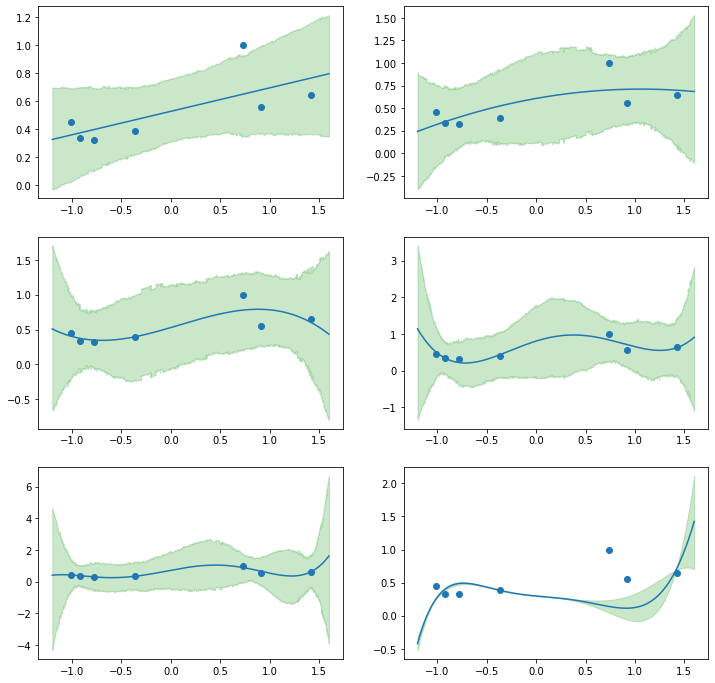

In [14]:
x=np.linspace(-1.2,1.6,10000)
f = plt.figure(figsize=(12,12))

ax1=f.add_subplot(321)
ax1.plot(d.mass_std, d.brain_std, 'o')
mu_pred = trace_7_1['alpha'] + trace_7_1['beta_mass'] * x[:,None]
ax1.plot(x, mu_pred.mean(1), 'C0')
mu_hpd = pm.hpd(mu_pred.T)
ax1.fill_between(x, mu_hpd[:,0], mu_hpd[:,1], color='C2', alpha=0.25)

ax2=f.add_subplot(322)
ax2.plot(d.mass_std, d.brain_std, 'o')
mu_pred = (trace_7_2['alpha'] + trace_7_2['beta_mass'][:,0]* x[:,None] 
           + trace_7_2['beta_mass'][:,1] * x[:,None]**2)
ax2.plot(x, mu_pred.mean(1), 'C0')
mu_hpd = pm.hpd(mu_pred.T)
ax2.fill_between(x, mu_hpd[:,0], mu_hpd[:,1], color='C2', alpha=0.25)

ax3=f.add_subplot(323)
ax3.plot(d.mass_std, d.brain_std, 'o')
mu_pred = (trace_7_3['alpha'] + trace_7_3['beta_mass'][:,0]* x[:,None] 
           + trace_7_3['beta_mass'][:,1] * x[:,None]**2 
           + trace_7_3['beta_mass'][:,2] * x[:,None]**3)
ax3.plot(x, mu_pred.mean(1), 'C0')
mu_hpd = pm.hpd(mu_pred.T)
ax3.fill_between(x, mu_hpd[:,0], mu_hpd[:,1], color='C2', alpha=0.25)

ax4=f.add_subplot(324)
ax4.plot(d.mass_std, d.brain_std, 'o')
mu_pred = (trace_7_4['alpha'] + trace_7_4['beta_mass'][:,0]* x[:,None] 
           + trace_7_4['beta_mass'][:,1] * x[:,None]**2 
           + trace_7_4['beta_mass'][:,2] * x[:,None]**3
           + trace_7_4['beta_mass'][:,3] * x[:,None]**4)
ax4.plot(x, mu_pred.mean(1), 'C0')
mu_hpd = pm.hpd(mu_pred.T)
ax4.fill_between(x, mu_hpd[:,0], mu_hpd[:,1], color='C2', alpha=0.25)

ax5=f.add_subplot(325)
ax5.plot(d.mass_std, d.brain_std, 'o')
mu_pred = (trace_7_5['alpha'] + trace_7_5['beta_mass'][:,0]* x[:,None] 
           + trace_7_5['beta_mass'][:,1] * x[:,None]**2 
           + trace_7_5['beta_mass'][:,2] * x[:,None]**3
           + trace_7_5['beta_mass'][:,3] * x[:,None]**4
           + trace_7_5['beta_mass'][:,4] * x[:,None]**5)
ax5.plot(x, mu_pred.mean(1), 'C0')
mu_hpd = pm.hpd(mu_pred.T)
ax5.fill_between(x, mu_hpd[:,0], mu_hpd[:,1], color='C2', alpha=0.25)

ax6=f.add_subplot(326)
ax6.plot(d.mass_std, d.brain_std, 'o')
mu_pred = (trace_7_6['alpha'] + trace_7_6['beta_mass'][:,0]* x[:,None] 
           + trace_7_6['beta_mass'][:,1] * x[:,None]**2 
           + trace_7_6['beta_mass'][:,2] * x[:,None]**3
           + trace_7_6['beta_mass'][:,3] * x[:,None]**4
           + trace_7_6['beta_mass'][:,4] * x[:,None]**5
           + trace_7_6['beta_mass'][:,5] * x[:,None]**6)
ax6.plot(x, mu_pred.mean(1), 'C0')
mu_hpd = pm.hpd(mu_pred.T)
ax6.fill_between(x, mu_hpd[:,0], mu_hpd[:,1], color='C2', alpha=0.25);

# Overfitting is bad. There's something wrong with the sixth graph, probably having to do
# with the sigma value and how PyMC3 differs from R, but I'm not going to worry about it.

In [15]:
# R code 7.11
with pm.Model() as m_7_7:
    alpha = pm.Normal('alpha', mu=0.5, sd=1) 
    mu = pm.Deterministic('mu', alpha)
    sigma = pm.Lognormal('sigma', mu=0, sd=1)
    brain = pm.Normal('brain', mu=mu, sd=sigma, observed=d.brain_std)
    trace_7_7 = pm.sample(10000, chains=1) 

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, alpha]
100%|██████████████████████████████████████████████████████████████████████████| 10500/10500 [00:05<00:00, 1956.22it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks


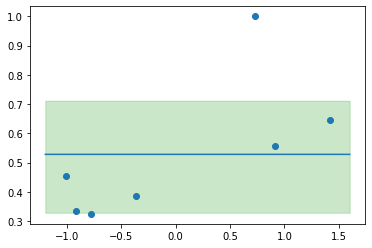

In [16]:
# Figure 7.4
x=np.linspace(-1.2,1.6,10000)

plt.plot(d.mass_std, d.brain_std, 'o')
mu_pred = trace_7_7['alpha'] + 0* x[:,None] # there has to be a better way to do this part.
plt.plot(x, mu_pred.mean(1), 'C0')
mu_hpd = pm.hpd(mu_pred.T, alpha=0.11)
plt.fill_between(x, mu_hpd[:,0], mu_hpd[:,1], color='C2', alpha=0.25);

In [18]:
# R code 7.14

waic_7_1 = pm.waic(trace_7_1, m_7_1)
waic_7_1.WAIC

C:\Users\mikev\Anaconda3\envs\stats\lib\site-packages\pymc3\stats.py:168: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.stack(logp)
C:\Users\mikev\Anaconda3\envs\stats\lib\site-packages\pymc3\stats.py:219: UserWarning: For one or more samples the posterior variance of the
        log predictive densities exceeds 0.4. This could be indication of
        WAIC starting to fail see http://arxiv.org/abs/1507.04544 for details
        
  """)


1.6256988820056804

In [2]:
# R code 7.20
# I think this part is going to be important to understand.
d1 = pd.read_csv('Data/cars.csv', sep=',', header=0)

In [4]:
# Creating the model - standard stuff.
with pm.Model() as m_7_8:
    alpha = pm.Normal('alpha', mu=0, sd=100) 
    beta = pm.Normal('beta', mu=0, sd=10)
    mu = pm.Deterministic('mu', alpha + beta*d1.speed)
    sigma = pm.Lognormal('sigma', mu=0, sd=1)
    distance = pm.Normal('distance', mu=mu, sd=sigma, observed=d1.dist)
    trace_7_8 = pm.sample(1000, chains=1) 

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, beta, alpha]
100%|█████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:01<00:00, 771.11it/s]
The acceptance probability does not match the target. It is 0.8800798843894991, but should be close to 0.8. Try to increase the number of tuning steps.
Only one chain was sampled, this makes it impossible to run some convergence checks


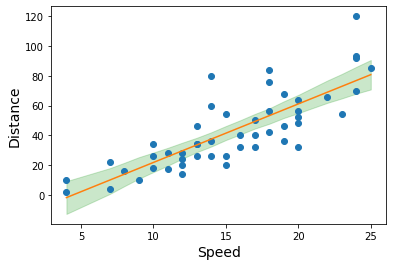

In [24]:
# Let's visualize the data and prediction.

mu_mean = trace_7_8['mu']
mu_hpd = pm.hpd(mu_mean, alpha=0.03)
x = np.linspace(4, 25, 1000)
plt.plot(d1.speed, d1.dist, 'o')
plt.plot(x, trace_7_8['alpha'].mean() + trace_7_8['beta'].mean()*x)

idx = np.argsort(d1.speed)
plt.fill_between(d1.speed, mu_hpd[:,0][idx], mu_hpd[:,1][idx], color='C2', alpha=0.25)

plt.xlabel('Speed', fontsize=14)
plt.ylabel('Distance', fontsize=14);


In [5]:
# R code 7.21
# https://github.com/aloctavodia/Statistical-Rethinking-with-Python-and-PyMC3/blob/master/Chp_06.ipynb
n_samples = 1000
n_observations = d1.shape[0]
logp = np.zeros((n_observations, n_samples))

# What we're going to do now is, for each sample from the posterior, work out the log 
# likelihood of each observation in the initial data set. That is, we're measuring how
# consistent the initial data set is with the model. We know the answer is "pretty
# good," because that's why the model came up with the coefficients it did. But now 
# we're quantifying "pretty good."

for s in range(0,n_samples): # for each sample from the posterior we're checking
    mu = trace_7_8['alpha'][s] + trace_7_8['beta'][s] * d1['speed'] # returns a 50x1 array, one column for each data point, of the predicted distance given the speed
    p_ = stats.norm.logpdf(d1['dist'], loc=mu, scale=trace_7_8['sigma'][s]) # this is the way of getting the log value of the prediction. It must be a distribution, because everything in this world is a distribution.
    logp[:,s] = p_ # we end up with each row being a data point, and each column being a sample

In [29]:
# R code 7.22

from scipy.special import logsumexp

n_cases = d1.shape[0] # number of rows in d1, e.g. number of data points
lppd = np.zeros((n_cases)) # I still don't understand why we have to fill this thing with zeros - maybe it's cleaner than just doing append
for a in range(1, n_cases):
    lppd[a,] = logsumexp(logp[a,]) - np.log(n_samples) # We have to do the averaging on the log scale. Not sure why - probably some computer science reason.

In [38]:
# R code 7.23
# Now computing the penalty term.
pWAIC = np.zeros((n_cases))
for a in range(1, n_cases):
    pWAIC[a] = np.var(logp[a]) # This just computes the variance of each row in logp.

In [40]:
# R code 7.24
# Computing WAIC:
WAIC = -2*(lppd.sum() - pWAIC.sum())
WAIC

412.28444236306524

In [43]:
# R code 7.25
# There will be variance in the above result due to sampling from the posterior, but the variance is
# smaller than the standard error of WAIC itself, as shown below:
WAIC_vector = -2*(lppd - pWAIC)
np.sqrt(n_cases*np.var(WAIC_vector))

15.763785032373228

In [48]:
# All of the above stuff was an exercise, as we can get everything we need from a PyMC3 method easily:
cars_waic = pm.waic(trace_7_8, m_7_8)
cars_waic.WAIC
# The fact that this number differs from the one above isn't concerning. Absolute WAIC isn't important. 
# We only care about the WAIC scores for competing models.

419.7608691103378

In [49]:
# Bringing lots of code from chapter 6 to help with the next bit

#R code 6.14

N = 100 # number of plants
h_0 = stats.norm.rvs(loc=10, scale=2, size = N) #simulate initial heights
treatment = np.repeat([0,1], [N/2]) #treat half the plants
fungus = stats.binom.rvs(size = N, n=1, p=(0.5 -  treatment*0.4)) # fungus results
h_1 = h_0 + stats.norm.rvs(size=N, loc=(5-3*fungus)) #final height
d = pd.DataFrame({'h_0': h_0,
                  'h_1': h_1,
                  'treatment':treatment,
                  'fungus': fungus})

#this 'data' will inform our priors for the next model

#R code 6.16
with pm.Model() as m_6_6:
    p = pm.Lognormal('proportion', mu=0, sd=0.25) 
    mu = pm.Deterministic('mu', p*d.h_0)
    sigma = pm.Exponential('sigma', 1)
    h_1 = pm.Normal('h_1', mu=mu, sd=sigma, observed=d.h_1)
    trace_6_6 = pm.sample(1000, tune=1000, chains=1) 
    
#R code 6.17
with pm.Model() as m_6_7:
    alpha = pm.Lognormal('alpha', mu=0, sd=0.25) #note alpha here is the old p
    beta_treatment = pm.Normal('beta_treatment', mu=0, sd=0.5) 
    beta_fungus = pm.Normal('beta_fungus', mu=0, sd=0.5) 
    p = pm.Deterministic('proportion', alpha + beta_treatment * d.treatment + beta_fungus * d.fungus)
    mu = pm.Deterministic('mu', p*d.h_0)
    sigma = pm.Exponential('sigma', 1)
    h_1 = pm.Normal('h_1', mu=mu, sd=sigma, observed=d.h_1)
    trace_6_7 = pm.sample(1000, tune=1000, chains=1) 

with pm.Model() as m_6_8:
    alpha = pm.Lognormal('alpha', mu=0, sd=0.25) #note alpha here is the old p
    beta_treatment = pm.Normal('beta_treatment', mu=0, sd=0.5) 
    p = pm.Deterministic('proportion', alpha + beta_treatment * d.treatment)
    mu = pm.Deterministic('mu', p*d.h_0)
    sigma = pm.Exponential('sigma', 1)
    h_1 = pm.Normal('h_1', mu=mu, sd=sigma, observed=d.h_1)
    trace_6_8 = pm.sample(1000, tune=1000, chains=1) 

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, proportion]
100%|████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:00<00:00, 2307.65it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, beta_fungus, beta_treatment, alpha]
100%|████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1202.23it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, beta_treatment, alpha]
100%|████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1565.43it/s]
Only one ch

In [51]:
# R code 7.26 and 7.27

m_6_6.name = 'only height dependency'
m_6_7.name = 'treatment and fungus'
m_6_8.name = 'treatment only'
df_comp_WAIC = pm.compare({m_6_6: trace_6_6, m_6_7: trace_6_7, m_6_8: trace_6_8})
df_comp_WAIC

C:\Users\mikev\Anaconda3\envs\stats\lib\site-packages\pymc3\stats.py:168: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.stack(logp)
C:\Users\mikev\Anaconda3\envs\stats\lib\site-packages\pymc3\stats.py:168: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.stack(logp)
C:\Users\mikev\Anaconda3\envs\stats\lib\site-packages\pymc3\stats.py:168: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.stack(logp)


,WAIC,pWAIC,dWAIC,weight,SE,dSE,var_warn
treatment and fungus,349.86,3.56,0,1,13.78,0,0
treatment only,401.06,2.49,51.2,0,12.26,11.91,0
only height dependency,408.72,1.91,58.86,0,12.55,12.93,0


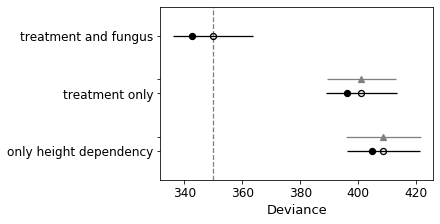

In [52]:
# R code 7.30

pm.compareplot(df_comp_WAIC);

In [57]:
# R code 7.33

d2 = pd.read_csv('Data/primates301.csv', sep=';', header=0)
d2.head()

,name,genus,species,subspecies,spp_id,genus_id,social_learning,research_effort,brain,body,group_size,gestation,weaning,longevity,sex_maturity,maternal_investment
0,Allenopithecus_nigroviridis,Allenopithecus,nigroviridis,NaN,1,1,0.0,6.0,58.02,4655.00,40.0,NaN,106.15,276.0,NaN,NaN
1,Allocebus_trichotis,Allocebus,trichotis,NaN,2,2,0.0,6.0,NaN,78.09,1.0,NaN,NaN,NaN,NaN,NaN
2,Alouatta_belzebul,Alouatta,belzebul,NaN,3,3,0.0,15.0,52.84,6395.00,7.4,NaN,NaN,NaN,NaN,NaN
3,Alouatta_caraya,Alouatta,caraya,NaN,4,3,0.0,45.0,52.63,5383.00,8.9,185.92,323.16,243.6,1276.72,509.08
4,Alouatta_guariba,Alouatta,guariba,NaN,5,3,0.0,37.0,51.70,5175.00,7.4,NaN,NaN,NaN,NaN,NaN
